## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
filename = "~/data/data_000637.txt"
n_rows = np.random.randint(low=10000, high=1310719)
print("rows: ", n_rows)
data = pd.read_csv(filename, nrows=n_rows)

# create dataframe
df = pd.DataFrame(data)
print(df)

rows:  761198
        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0          1     0          123  3869200167        2374        26
1          1     0          124  3869200167        2374        27
2          1     0           63  3869200167        2553        28
3          1     0           64  3869200167        2558        19
4          1     0           64  3869200167        2760        25
...      ...   ...          ...         ...         ...       ...
761193     1     0           61  3869207426        2840        11
761194     1     0          123  3869207426        2863        27
761195     1     0           61  3869207426        2867         7
761196     1     1            2  3869207426        2872        27
761197     1     0          124  3869207426        2863        12

[761198 rows x 6 columns]


2\. Find out the number of BX in a ORBIT (the value 'x').

In [3]:
x_BX = np.max(data['BX_COUNTER'])+1
# the min value is 0 so the difference is equal to the max value
print("x value: ", x_BX)

x value:  3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
# use the whole dataset
data = pd.read_csv(filename)
last_index = len(data)-1

time_ns = np.array((data['ORBIT_CNT']*(x_BX)*25 + data['BX_COUNTER']*25 + data['TDC_MEAS']*25/30))

estimated_time = time_ns[last_index] - time_ns[0]
print("Estiamted total time in ns: ", estimated_time)
print("Estiamted total time in s: ", estimated_time*(10**(-9)))

Estiamted total time in ns:  980416093.3125
Estiamted total time in s:  0.9804160933125


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
# now I do the same thing but for the dataframe with less entries
time_ns_df = np.array((df['ORBIT_CNT']*(x_BX)*25 + df['BX_COUNTER']*25 + df['TDC_MEAS']*25/30))

df['TIME_NS'] = time_ns_df
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_NS
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
761193,1,0,61,3869207426,2840,11,3.447464e+14
761194,1,0,123,3869207426,2863,27,3.447464e+14
761195,1,0,61,3869207426,2867,7,3.447464e+14
761196,1,1,2,3869207426,2872,27,3.447464e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
df['HEAD'] = np.random.randint(0, 2, df.shape[0])
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_NS
0,0,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
761193,0,0,61,3869207426,2840,11,3.447464e+14
761194,1,0,123,3869207426,2863,27,3.447464e+14
761195,1,0,61,3869207426,2867,7,3.447464e+14
761196,1,1,2,3869207426,2872,27,3.447464e+14


In [7]:
df['HEAD'].value_counts()

0    381226
1    379972
Name: HEAD, dtype: int64

6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [8]:
df1 = df.copy()
df1 = df1[df1['HEAD'] > 0]
df1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_NS
4,1,0,64,3869200167,2760,25,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
10,1,1,7,3869200167,2785,4,3.447457e+14
11,1,0,64,3869200167,2786,19,3.447457e+14
...,...,...,...,...,...,...,...
761192,1,0,62,3869207426,2836,22,3.447464e+14
761194,1,0,123,3869207426,2863,27,3.447464e+14
761195,1,0,61,3869207426,2867,7,3.447464e+14
761196,1,1,2,3869207426,2872,27,3.447464e+14


In [9]:
print("Should be the total number of rows less the ones with a 0 on HEAD")
print("Correct value: ", len(df)-len(df1)== df['HEAD'].value_counts()[0])

Should be the total number of rows less the ones with a 0 on HEAD
Correct value:  True


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

(array([3.5300e+04, 1.2738e+04, 1.5252e+04, 8.6090e+03, 1.1044e+04,
        8.0030e+03, 1.0436e+04, 5.4000e+01, 7.5200e+03, 5.3130e+03,
        7.4310e+03, 3.5970e+03, 4.8500e+03, 3.1990e+03, 4.7920e+03,
        2.0540e+03, 3.0600e+03, 2.0180e+03, 3.3310e+03, 1.3530e+03,
        2.0950e+03, 1.4520e+03, 2.5740e+03, 1.0400e+03, 1.6290e+03,
        1.0510e+03, 2.7020e+03, 1.2350e+03, 8.5900e+02, 1.6810e+03,
        6.7700e+02, 1.0810e+03, 7.8500e+02, 1.4720e+03, 5.4600e+02,
        9.0200e+02, 6.0800e+02, 1.2230e+03, 4.7500e+02, 7.9200e+02,
        5.4200e+02, 1.0430e+03, 3.9200e+02, 6.8700e+02, 5.1500e+02,
        9.7600e+02, 4.1600e+02, 6.2500e+02, 4.7300e+02, 8.8400e+02,
        4.6200e+02, 6.2200e+02, 4.8100e+02, 1.2430e+03, 6.0300e+02,
        5.0500e+02, 8.7100e+02, 4.5500e+02, 6.3600e+02, 5.5300e+02,
        8.4900e+02, 4.3100e+02, 3.3900e+02, 2.8100e+02, 3.2600e+02,
        2.5300e+02, 1.9200e+02, 1.8000e+02, 1.9000e+02, 1.7600e+02,
        1.3900e+02, 1.0300e+02, 1.1200e+02, 1.30

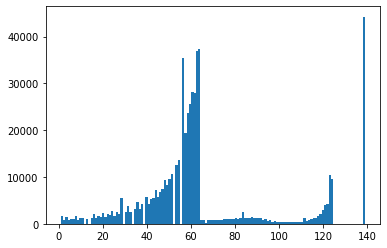

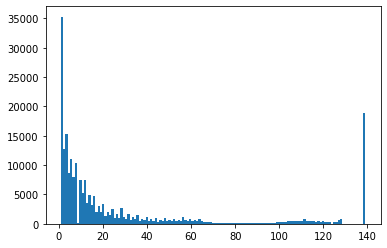

In [10]:
# take the entries with fpga = 0 and the ones = 1
fpga_0 = df[df['FPGA']==0]
fpga_1 = df[df['FPGA']==1]

n_channels = len(np.unique(data['TDC_CHANNEL'])) # total number of channel in order to divide the histograms

# plot the data for fpga = 0
plt.figure(1)
plt.hist(fpga_0['TDC_CHANNEL'], bins=n_channels)

# plot the data for fpga = 1
plt.figure(2)
plt.hist(fpga_1['TDC_CHANNEL'], bins=n_channels)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [11]:
tmp = df.groupby('TDC_CHANNEL').count()['FPGA']  # count on fpga
tmp.nlargest(3)  # take the top three largest values

TDC_CHANNEL
139    63081
64     38206
63     37503
Name: FPGA, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [12]:
unique_orbits = np.unique(df['ORBIT_CNT'])
print("Number of unique orbit values:", len(unique_orbits))

unique_orbits_139 = np.unique(df[df['TDC_CHANNEL']==139]['ORBIT_CNT'])
#tmp = df[df['TDC_CHANNEL']==139]
#tmp
print("Number of unique orbit values for channel 139:",len(unique_orbits_139))

Number of unique orbit values: 7256
Number of unique orbit values for channel 139: 7231
